# Trybe Challenge
### Daniel N. Rocha
Processo Seletivo para Data Scientist <br>
Open University Learning Analytics dataset
This page introduces the anonymised Open University Learning Analytics Dataset (OULAD). It contains data about courses, students and their interactions with Virtual Learning Environment (VLE) for seven selected courses (called modules). Presentations of courses start in February and October - they are marked by “B” and “J” respectively. The dataset consists of tables connected using unique identifiers. All tables are stored in the csv format.

<div>
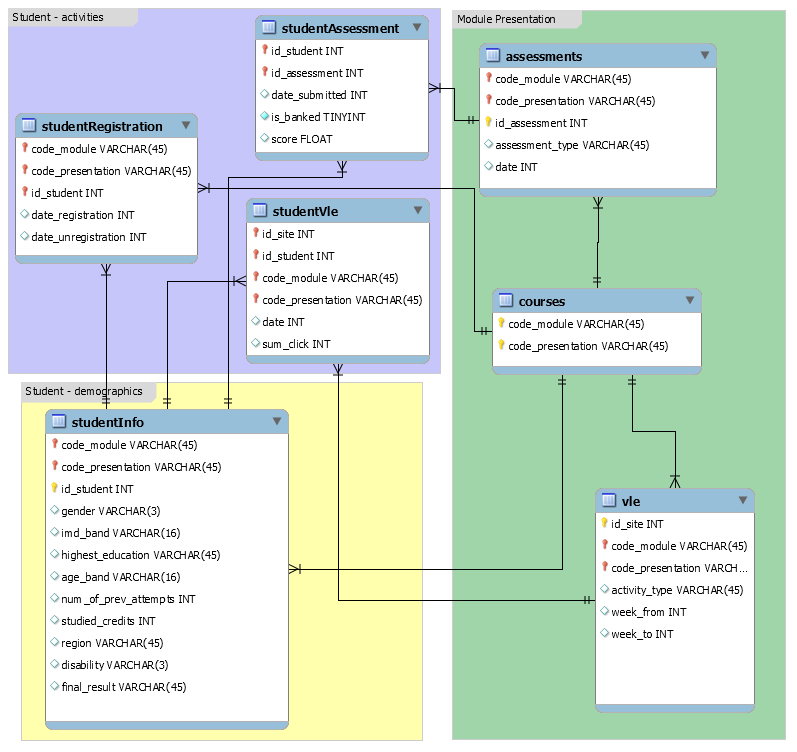
</div>

### Importing packages:

In [519]:
import pandas as pd
import numpy as np
import seaborn as sns
import palettable
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [520]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 10)

import matplotlib.style
import matplotlib as mpl
for m,n in zip(['grid.color','axes.titlecolor','axes.labelcolor','xtick.color','ytick.color','axes.titlesize',
    'figure.figsize','legend.framealpha'],['white','white','white','white','white','20.0','13.0, 8.0','0.8']):
    mpl.rcParams[m] = n

### Importing the data:

In [3]:
path = '/Users/pedrocerbino/TrybeChallenge/anonymisedData/'

In [4]:
# list of all available modules and their presentations
courses = pd.read_csv(path+'courses.csv')
courses.head(2)

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269


## Exploratory Data Analysis

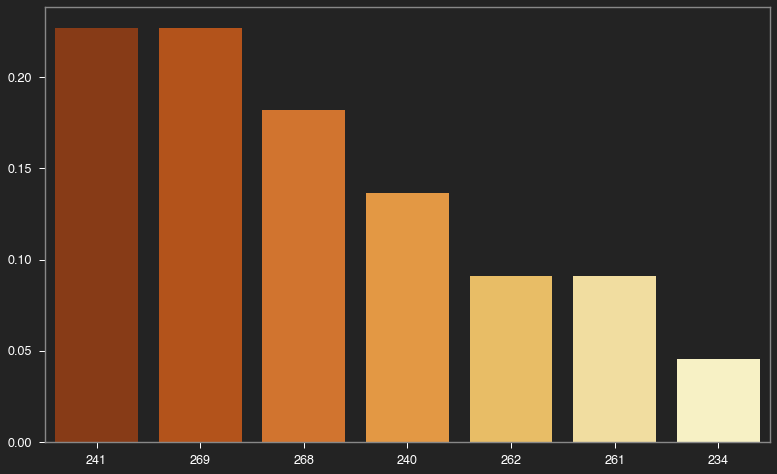

In [867]:
to_plot = courses.module_presentation_length.value_counts(True)
sns.barplot(x=to_plot.index,y=to_plot.values,palette='YlOrBr_r',order=to_plot.index);

In [5]:
# demographic information about the students together with their results
studentInfo = pd.read_csv(path+'studentInfo.csv')
studentInfo.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass


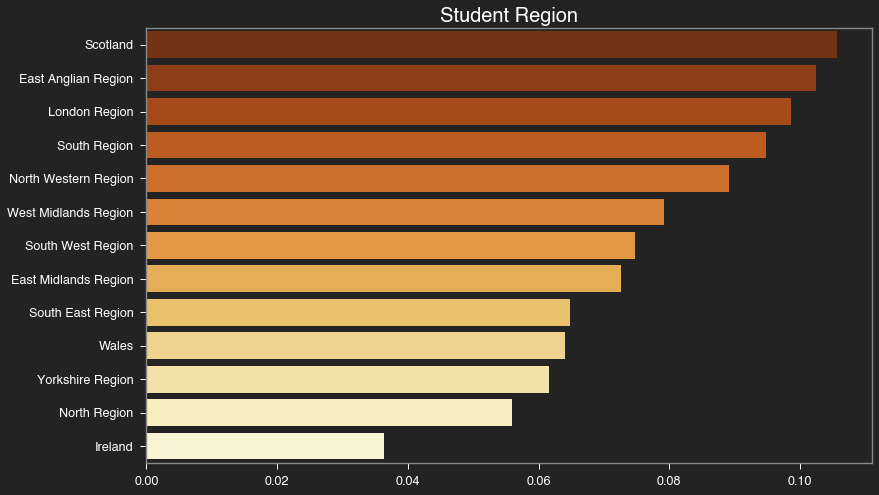

In [857]:
to_plot = studentInfo.region.value_counts(True)
sns.barplot(y=to_plot.index,x=to_plot.values,palette='YlOrBr_r')
plt.title('Student Region');

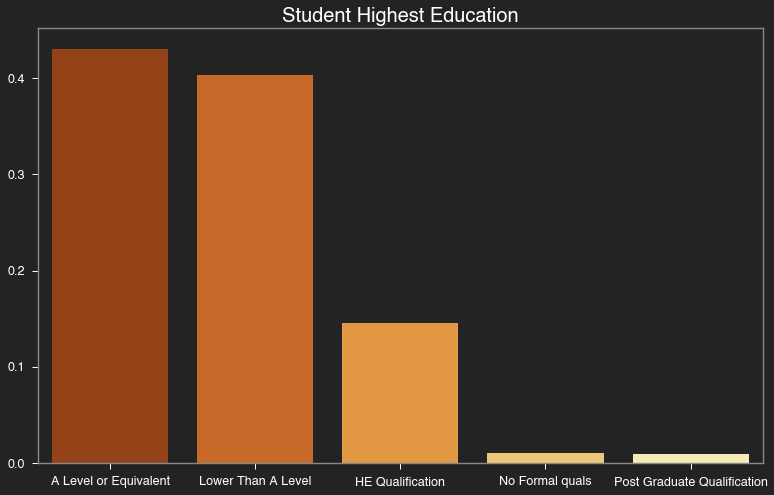

In [853]:
to_plot = studentInfo.highest_education.value_counts(True)
sns.barplot(x=to_plot.index,y=to_plot.values,palette='YlOrBr_r')
plt.title('Student Highest Education');

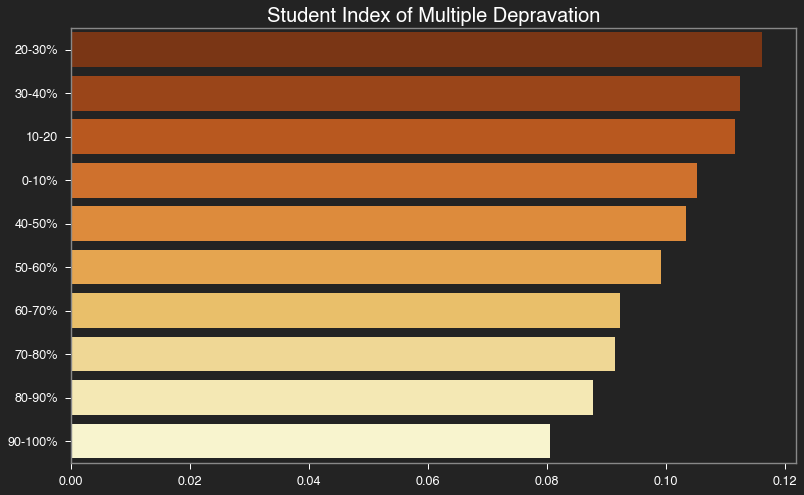

In [856]:
to_plot = studentInfo.imd_band.value_counts(True)
sns.barplot(y=to_plot.index,x=to_plot.values,palette='YlOrBr_r')
plt.title('Student Index of Multiple Depravation');

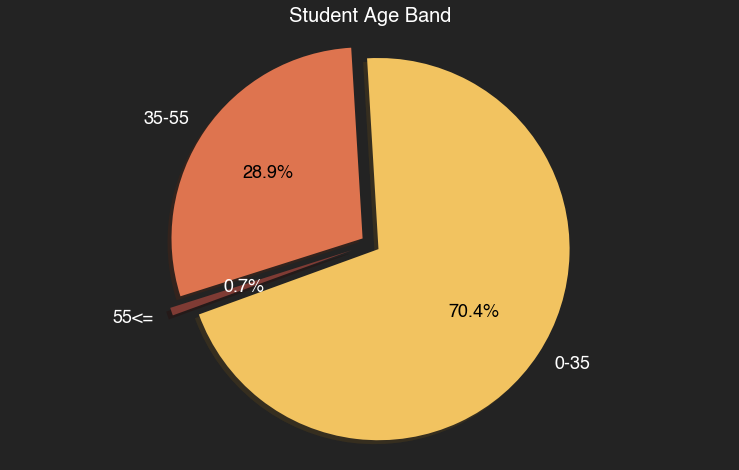

In [840]:
to_plot = studentInfo.age_band.value_counts(True)

import palettable
cmap = palettable.scientific.sequential.LaJolla_5.hex_colors[1:-1]

explode = (0.05, 0.05, 0.1)
_, _, autotexts = plt.pie(to_plot.values, explode=explode, labels=to_plot.index, autopct='%1.1f%%',
        shadow=True, startangle=200, colors=cmap, textprops={'size':18,'color':'w'})
plt.axis('equal')
plt.title('Student Age Band')
i=0
for autotext in autotexts:
    if i==2:
        autotext.set_color('w')
    else:
        autotext.set_color('black');
    i+=1

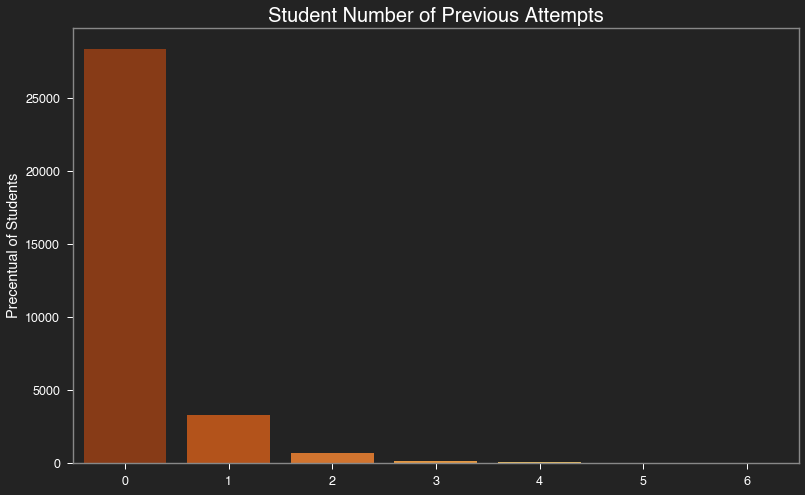

In [868]:
to_plot = studentInfo.num_of_prev_attempts.value_counts(True)
sns.barplot(x=to_plot.index,y=to_plot.values,palette='YlOrBr_r')
plt.title('Student Number of Previous Attempts')
plt.ylabel('Precentual of Students');

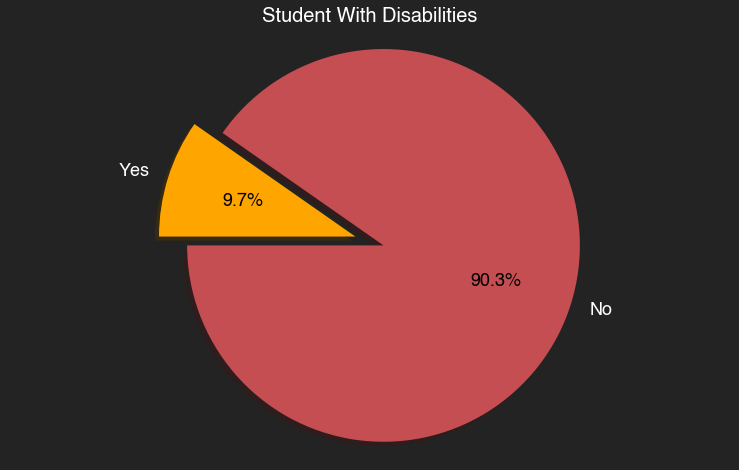

In [842]:
to_plot = studentInfo.disability.value_counts(True)

explode = (0, 0.15)
_, _, autotexts = plt.pie(to_plot.values, explode=explode, labels=['No','Yes'], autopct='%1.1f%%',
        shadow=True, startangle=180, colors=['r','orange'], textprops={'size':18,'color':'w'})
plt.axis('equal')
plt.title('Student With Disabilities')
for autotext in autotexts:
    autotext.set_color('black');

In [836]:
import palettable
cmap = palettable.scientific.sequential.LaJolla_6.hex_colors[1:]

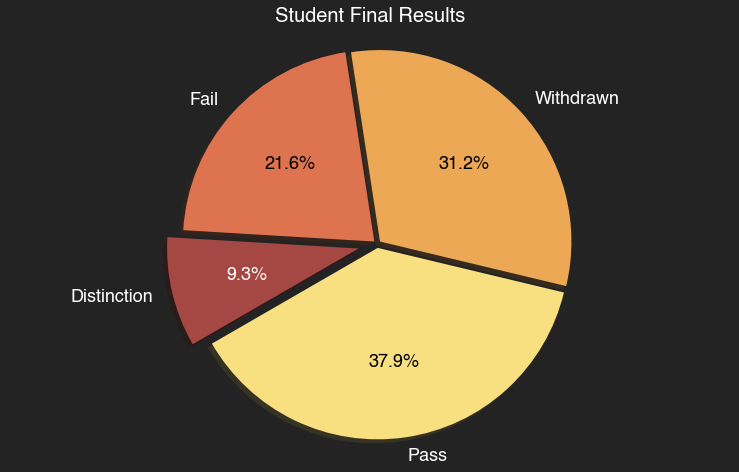

In [873]:
to_plot = studentInfo.final_result.value_counts(True)

explode = (0.02, 0.02, 0.02, 0.1)
fig1, ax1 = plt.subplots()
_, _, autotexts = plt.pie(to_plot.values, explode=explode, labels=to_plot.index, autopct='%1.1f%%',
        shadow=True, startangle=210, colors=cmap, textprops={'size':18,'color':'w'})
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Student Final Results")
i=0
for autotext in autotexts:
    if i==3:
        autotext.set_color('w')
    else:
        autotext.set_color('black');
    i+=1

In [6]:
# information about the time when the student registered for the module presentation
# for students who unregistered the date of unregistration is also recorded. 
studentRegistration = pd.read_csv(path+'studentRegistration.csv')
studentRegistration.head(2)

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN


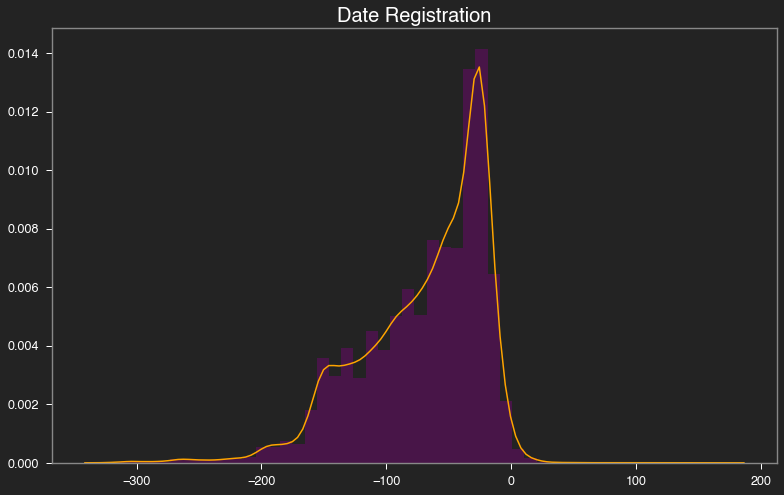

In [879]:
sns.distplot(studentRegistration.date_registration, color='purple', kde_kws={"color":"orange"})
plt.title('Date Registration')
plt.xlabel('');

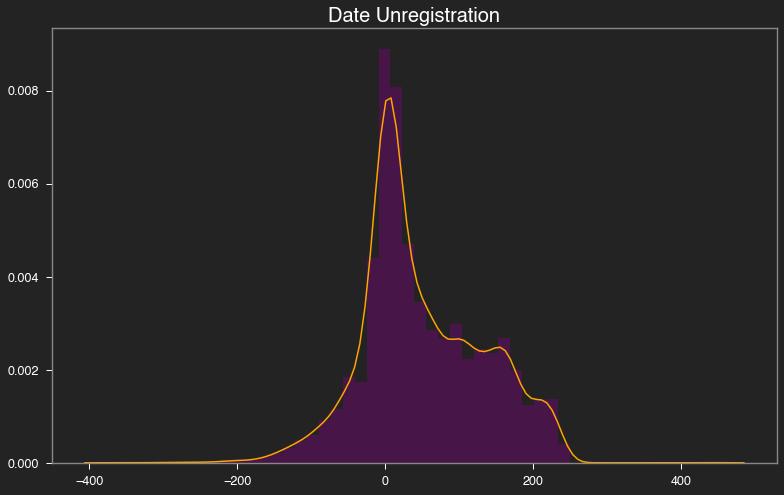

In [878]:
sns.distplot(studentRegistration.date_unregistration, color='purple', kde_kws={"color":"orange"})
plt.title('Date Unregistration')
plt.xlabel('');

In [7]:
student = studentInfo.merge(studentRegistration)
student.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,-53.0,NaN


In [8]:
# information about assessments in module-presentations. 
# usually, every presentation has a number of assessments followed by the final exam
assessments = pd.read_csv(path+'assessments.csv')
assessments.rename(inplace=True,columns={'date':'assessments_date'})
assessments.head(2)

,code_module,code_presentation,id_assessment,assessment_type,assessments_date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0


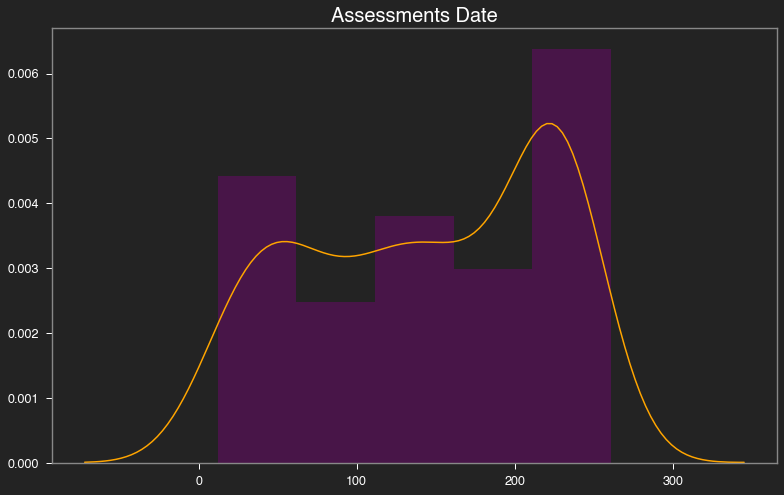

In [877]:
sns.distplot(assessments.assessments_date, color='purple', kde_kws={"color":"orange"})
plt.title('Assessments Date')
plt.xlabel('');

In [9]:
# results of students’ assessments. 
# if the student does not submit the assessment, no result is recorded. 
# the final exam submissions is missing, if the result of the assessments is not stored 
# in the system
studentAssessment = pd.read_csv(path+'studentAssessment.csv')
studentAssessment.head(2)

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0


### Creating the Weighted Score Variable

In [117]:
studentWeightedScore = studentAssessment.merge(assessments)
studentWeightedScore['weighted_score'] = studentWeightedScore.score * studentWeightedScore.weight
studentWeightedScore.drop(columns=['score','weight'],inplace=True)
studentWeightedScore.head(2)

,id_assessment,id_student,date_submitted,is_banked,code_module,code_presentation,assessment_type,assessments_date,weighted_score
0,1752,11391,18,0,AAA,2013J,TMA,19.0,780.0
1,1752,28400,22,0,AAA,2013J,TMA,19.0,700.0


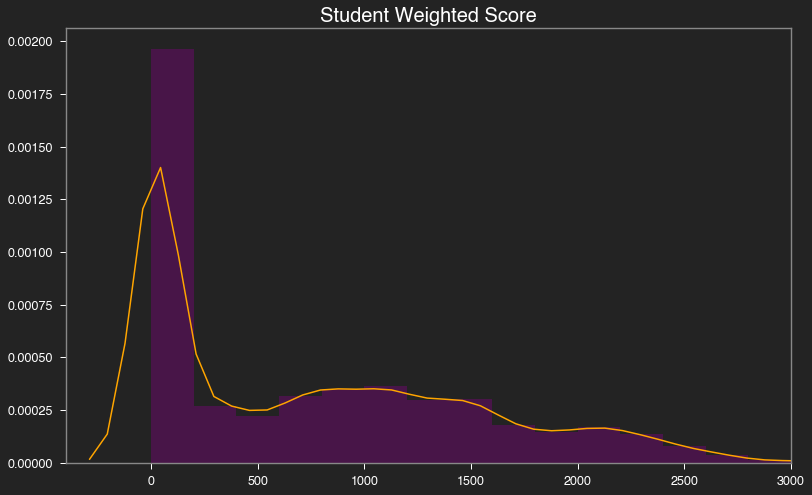

In [883]:
sns.distplot(studentWeightedScore.weighted_score, color='purple', kde_kws={"color":"orange"})
plt.title('Student Weighted Score')
plt.xlim(-400,3000)
plt.xlabel('');

In [118]:
df = student.merge(studentWeightedScore).merge(courses).drop_duplicates()
df.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_unregistration,id_assessment,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1752,18,0,TMA,19.0,780.0,268
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,NaN,1753,53,0,TMA,54.0,1700.0,268


In [119]:
# information about the available materials in the VLE. Typically these are html pages or pdf files
# students have access to these materials online and their interactions with the materials are 
# recorded
vle = pd.read_csv(path+'vle.csv')
vle.head(2)

,id_site,code_module,code_presentation,activity_type,week_from,week_to
0,546943,AAA,2013J,resource,NaN,NaN
1,546712,AAA,2013J,oucontent,NaN,NaN


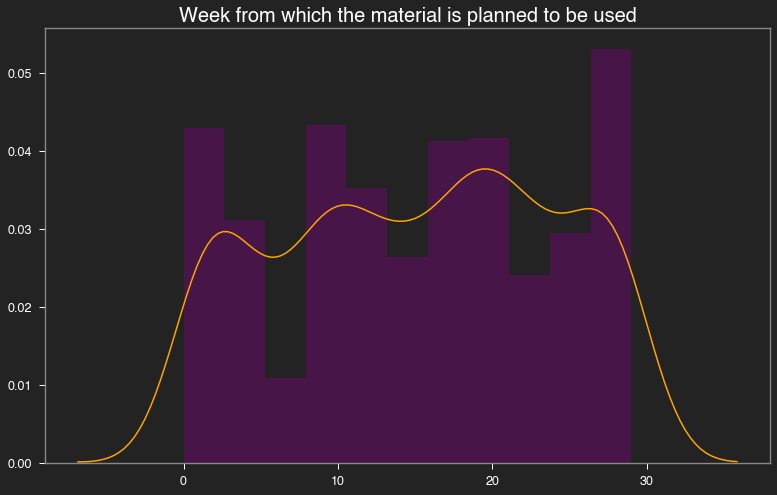

In [874]:
sns.distplot(vle.week_from, color='purple', kde_kws={"color":"orange"})
plt.title('Week from which the material is planned to be used')
plt.xlabel('');

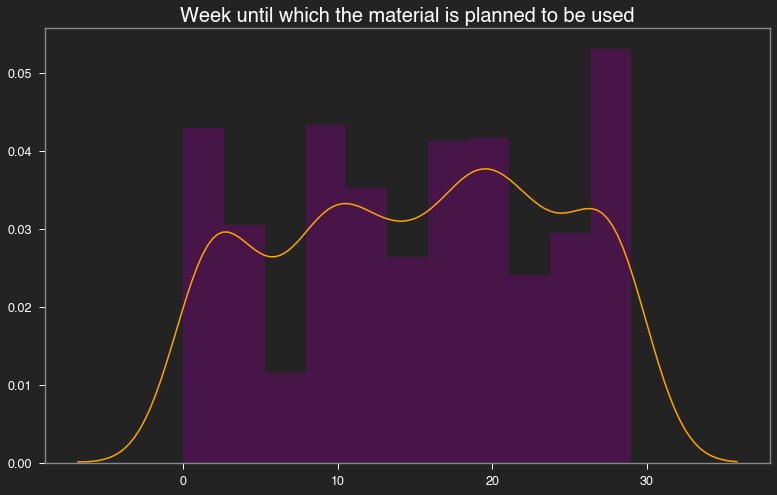

In [875]:
sns.distplot(vle.week_to, color='purple', kde_kws={"color":"orange"})
plt.title('Week until which the material is planned to be used')
plt.xlabel('');

In [120]:
# student’s interactions with the materials in the VLE
studentVle = pd.read_csv(path+'studentVle.csv')
studentVle.rename(inplace=True,columns={'date':'vle_date'})
studentVle.head(2)

,code_module,code_presentation,id_student,id_site,vle_date,sum_click
0,AAA,2013J,28400,546652,-10,4
1,AAA,2013J,28400,546652,-10,1


In [556]:
studentVle.sum_click.value_counts(True)

1       4.799414e-01
2       1.810392e-01
3       9.059143e-02
4       5.751684e-02
5       3.896087e-02
            ...     
403     9.385019e-08
402     9.385019e-08
401     9.385019e-08
395     9.385019e-08
6977    9.385019e-08
Name: sum_click, Length: 498, dtype: float64

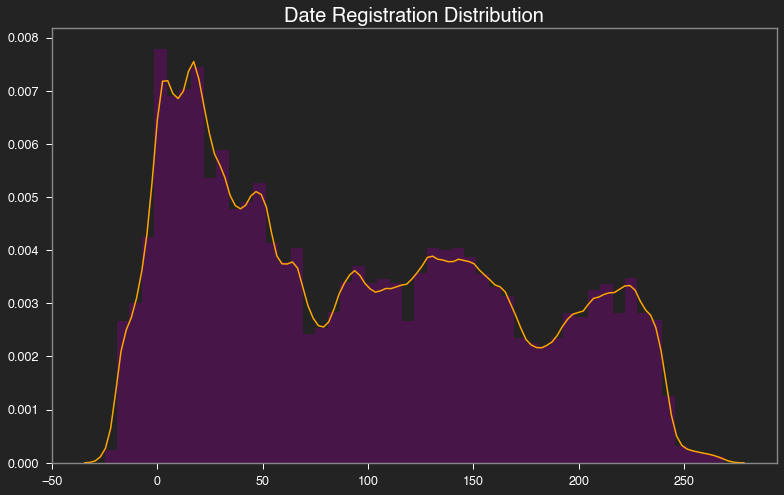

In [549]:
sns.distplot(studentVle.vle_date, color='purple', kde_kws={"color":"orange"})
plt.title('Date Registration Distribution')
plt.xlabel('');

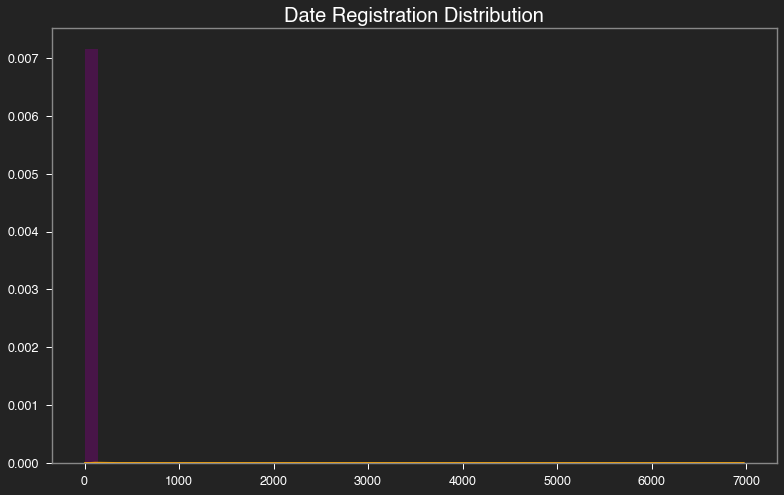

In [557]:
sns.distplot(studentVle.sum_click, color='purple', kde_kws={"color":"orange"})
plt.title('Date Registration Distribution')
# plt.xlim(-10,150)
plt.xlabel('');

## Merging and Grouping the data

In [121]:
studentVleMerge = studentVle.merge(vle).drop_duplicates()
studentVleMerge.head(2)

,code_module,code_presentation,id_student,id_site,vle_date,sum_click,activity_type,week_from,week_to
0,AAA,2013J,28400,546652,-10,4,forumng,NaN,NaN
1,AAA,2013J,28400,546652,-10,1,forumng,NaN,NaN


In [122]:
df1=studentVleMerge.groupby(['id_student','code_presentation','code_module'],as_index=False).mean()
df1.head(2)

,id_student,code_presentation,code_module,id_site,vle_date,sum_click,week_from,week_to
0,6516,2014J,AAA,877298.465600,111.059200,4.344000,1.428571,1.428571
1,8462,2013J,DDD,673960.576792,37.645051,2.163823,NaN,NaN


In [170]:
df2 = df.merge(df1).drop_duplicates()
df2.drop(inplace=True,columns=['id_site','id_assessment','date_unregistration','week_to','week_from'])
df2.head(2)

,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,date_registration,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,18,0,TMA,19.0,780.0,268,101.651042,4.802083
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,-159.0,53,0,TMA,54.0,1700.0,268,101.651042,4.802083


In [171]:
df3 = pd.get_dummies(df2,drop_first=True,columns=['gender','region','highest_education','imd_band',
                                             'age_band','disability'])
df3.head(2)

,code_module,code_presentation,id_student,num_of_prev_attempts,studied_credits,final_result,date_registration,date_submitted,is_banked,assessment_type,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y
0,AAA,2013J,11391,0,240,Pass,-159.0,18,0,TMA,19.0,780.0,268,101.651042,4.802083,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
1,AAA,2013J,11391,0,240,Pass,-159.0,53,0,TMA,54.0,1700.0,268,101.651042,4.802083,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0


In [172]:
df4 = df3.groupby(['id_student','final_result'],as_index=False).mean()
df4 = df4[~df4.weighted_score.isna()].copy()
df4.date_registration.fillna(0,inplace=True)
df4.rename(columns={'age_band_55<=':'age_band_55_or_more'},inplace=True)
df4.head(2)

,id_student,final_result,num_of_prev_attempts,studied_credits,date_registration,date_submitted,is_banked,assessments_date,weighted_score,module_presentation_length,vle_date,sum_click,gender_M,region_East Midlands Region,region_Ireland,region_London Region,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,highest_education_HE Qualification,highest_education_Lower Than A Level,highest_education_No Formal quals,highest_education_Post Graduate Qualification,imd_band_10-20,imd_band_20-30%,imd_band_30-40%,imd_band_40-50%,imd_band_50-60%,imd_band_60-70%,imd_band_70-80%,imd_band_80-90%,imd_band_90-100%,age_band_35-55,age_band_55<=,disability_Y
0,6516,Pass,0.000000,60.000000,-52.000000,111.6,0.000000,114.200000,1270.000000,269.000000,111.059200,4.344000,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,8462,Withdrawn,0.571429,72.857143,-80.428571,23.0,0.571429,57.142857,1112.857143,261.571429,21.847879,2.641638,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


## Plotting the Correlation

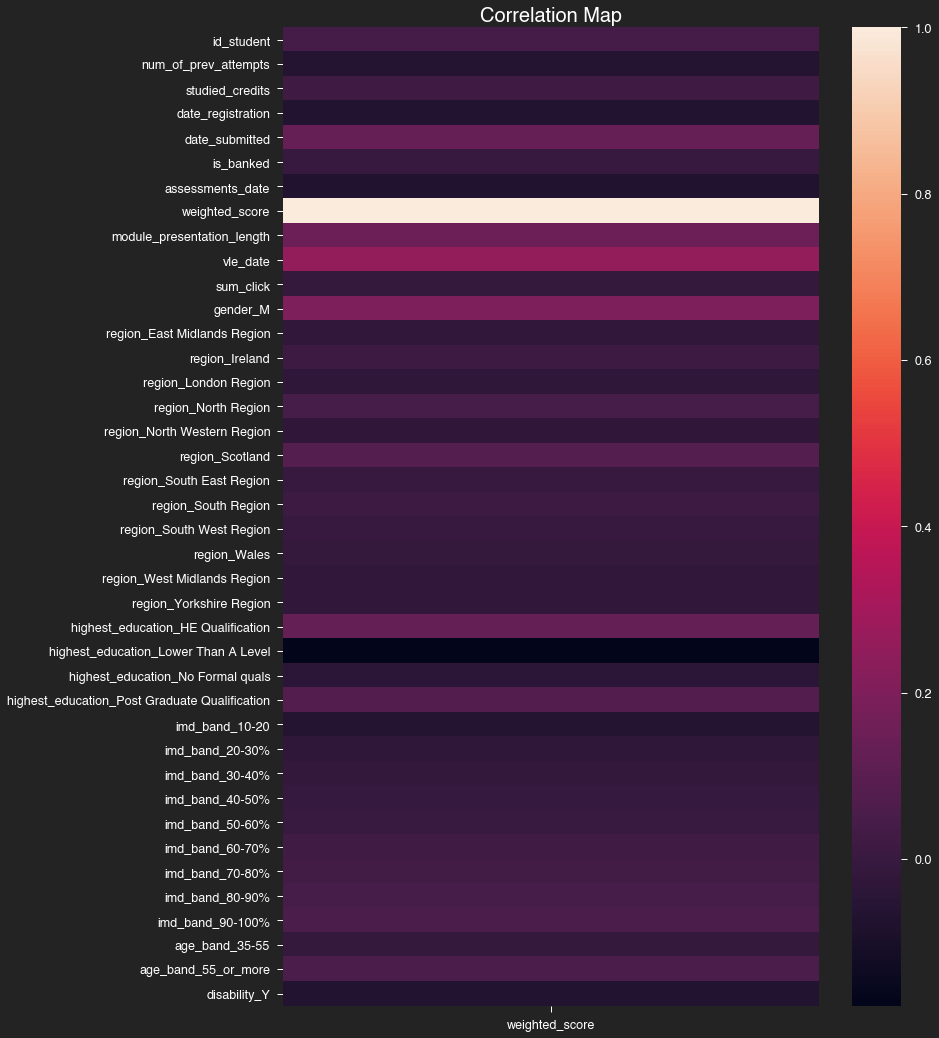

In [913]:
plt.figure(figsize=(12,18))
# sns.heatmap(pd.DataFrame(df3.corr()['WeightedScore']).drop('WeightedScore'))
sns.heatmap(pd.DataFrame(df4.corr()['weighted_score']))
plt.title('Correlation Map');

In [884]:
X, y = df4.drop(columns=['id_student','final_result','weighted_score']), df4.weighted_score

## Testing XGBoost Model

In [304]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score 
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse and the r squared
rmse = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print("RMSE: %f" % (rmse))
print("R2 Score: %f" % (r2))

RMSE: 303.480684
R2 Score: 0.794621


## XGBoost Cross Validation

In [908]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":10}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=100, 
                    metrics='rmse', as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0        828.046249        1.454260      832.945495       4.470909
1        611.395172        1.341905      622.562485       4.562910
2        465.032211        1.107895      486.144264       5.339342
3        368.848930        0.712105      400.257858       5.631499
4        306.555252        1.398803      348.756767       4.814004
..              ...             ...             ...            ...
95        75.833368        2.900201      282.948730       2.747768
96        75.111496        3.161456      282.959861       2.782041
97        74.224901        2.941732      283.025246       2.829611
98        73.548334        2.979277      282.999069       2.820336
99        72.984295        3.169519      283.020698       2.800365

[100 rows x 4 columns]
99    283.020698
Name: test-rmse-mean, dtype: float64


## Tuning the Model

### Number of Boosting Rounds
Early stopping works by testing the XGBoost model after every boosting round against a hold-out dataset and stopping the creation of additional boosting rounds (thereby finishing training of the model early) if the hold-out metric ("rmse" in our case) does not improve for a given number of rounds.

In [406]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree: params
params = {"objective":"reg:squarederror", "max_depth":10}

# Perform cross-validation with early stopping: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5, num_boost_round=100, 
                    metrics="rmse", as_pandas=True, seed=123, early_stopping_rounds=30)

# Print cv_results
print(cv_results.tail()) # 26

    train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
22       170.058554        2.846452      282.828949      11.069318
23       167.531830        2.038835      282.602063      11.049980
24       165.676260        1.892212      282.598816      10.961244
25       163.930911        2.316752      282.542291      11.194138
26       162.142538        2.012318      282.481293      11.337976


### ETA (Learning Rate)
Can range between 0 and 1, with higher values of "eta" penalizing feature weights more strongly, causing much stronger regularization.

In [411]:
# Create your housing DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary for each tree (boosting round)
params = {"objective":"reg:squarederror", "max_depth":10}

# Create list of eta values and empty list to store final round rmse per xgboost model
eta_vals = [0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
best_rmse = []

# Systematically vary the eta 
for curr_val in eta_vals:
    
    params["eta"] = curr_val

    # Perform cross-validation: cv_results
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5, metrics="rmse", 
                        as_pandas=True, seed=123, early_stopping_rounds=30, num_boost_round=100)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(eta_vals, best_rmse)), columns=["eta","best_rmse"])) # 0.100

      eta    best_rmse
0   0.001  1044.630029
1   0.010   504.710809
2   0.100   276.245197
3   0.200   280.821838
4   0.300   282.481293
..    ...          ...
7   0.600   293.178119
8   0.700   299.198737
9   0.800   300.416382
10  0.900   308.845715
11  1.000   312.341632

[12 rows x 2 columns]


### Max Depth
Maximum depth that each tree in a boosting round can grow to.

In [422]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params = {"objective":"reg:squarederror"}

# Create list of max_depth values
max_depths = [2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
best_rmse = []

# Systematically vary the max_depth
for curr_val in max_depths:

    params["max_depth"] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5, metrics="rmse", 
                        as_pandas=True, seed=123, early_stopping_rounds=30, num_boost_round=100)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])

# Print the resultant DataFrame
print(pd.DataFrame(list(zip(max_depths, best_rmse)),columns=["max_depth","best_rmse"])) # 6

    max_depth   best_rmse
0           2  322.668604
1           3  296.735999
2           4  283.491760
3           5  279.809247
4           6  278.671417
..        ...         ...
6           8  282.377826
7           9  281.510901
8          10  282.481299
9          15  295.021405
10         20  299.483704

[11 rows x 2 columns]


### Col Sample By Tree (Max Features)
Fraction of features to choose from at every split in a given tree

In [421]:
# Create your housing DMatrix
housing_dmatrix = xgb.DMatrix(data=X,label=y)

# Create the parameter dictionary
params={"objective":"reg:squarederror","max_depth":10}

# Create list of hyperparameter values: colsample_bytree_vals
colsample_bytree_vals = [0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
best_rmse = []

# Systematically vary the hyperparameter value 
for curr_val in colsample_bytree_vals:

    params['colsample_bytree'] = curr_val
    
    # Perform cross-validation
    cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=5,
                 num_boost_round=100, early_stopping_rounds=30,
                 metrics="rmse", as_pandas=True, seed=123)
    
    # Append the final round rmse to best_rmse
    best_rmse.append(cv_results["test-rmse-mean"].tail().values[-1])
# 0.8
# Print the resultant DataFrame 
print(pd.DataFrame(list(zip(colsample_bytree_vals, best_rmse)), columns=["colsample_bytree","best_rmse"]))

   colsample_bytree   best_rmse
0               0.1  307.473035
1               0.5  280.802588
2               0.6  284.407062
3               0.7  284.608203
4               0.8  279.857104
5               0.9  281.677936
6               1.0  282.481293


### Randomized Search Cross Validation
Often, GridSearchCV can be really time consuming, so in practice, you may want to use RandomizedSearchCV instead

In [438]:
from sklearn.model_selection import RandomizedSearchCV
# Create the parameter grid: gbm_param_grid 
gbm_param_grid = {
    'colsample_bytree': [0.3, 0.5, 0.7, 0.8],
    'n_estimators': [25, 50, 100, 200],
    'max_depth': range(2, 12),
    'eta': [i/10 for i in range(1, 10)]
}

# Instantiate the regressor: gbm
gbm = xgb.XGBRegressor()

# Perform random search: grid_mse
randomized_mse = RandomizedSearchCV(cv=4,n_iter=5,scoring='neg_mean_squared_error',
                                    estimator=gbm,param_distributions=gbm_param_grid,verbose=1)

# Fit randomized_mse to the data
randomized_mse.fit(X,y)

# Print the best parameters and lowest RMSE
print("Best parameters found: ", randomized_mse.best_params_)
print("Lowest RMSE found: ", np.sqrt(np.abs(randomized_mse.best_score_)))

Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   51.7s finished


Best parameters found:  {'n_estimators': 100, 'max_depth': 11, 'eta': 0.3, 'colsample_bytree': 0.7}
Lowest RMSE found:  285.7577382260332


## Final Model (XGBoost)

In [912]:
# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=200, max_depth=6, seed=123,
                          colsample_bytree=0.8, eta=0.1)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse and the r squared
rmse = np.sqrt(mean_squared_error(y_test,preds))
r2 = r2_score(y_test,preds)
print("RMSE: %f" % (rmse))
print("R2 Score: %f" % (r2))

RMSE: 264.960762
R2 Score: 0.843449


Setting feature_perturbation = "tree_path_dependent" because no background data was given.


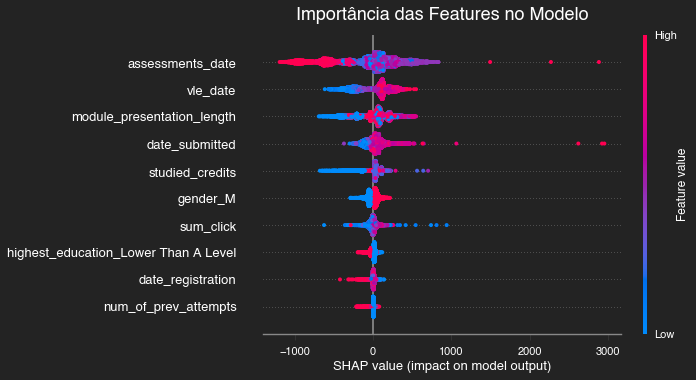

In [391]:
# monkey patch
booster = xg_reg.get_booster() 
model_bytearray = booster.save_raw()[4:]
booster.save_raw = lambda: model_bytearray

# shap expaliner
explainer = shap.TreeExplainer(booster, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X, check_additivity=False)
plt.title('Importância das Features no Modelo', size=18, color='w', pad=15)
shap.summary_plot(shap_values, X, show=False, max_display=10)

plt.xticks(color='w')
plt.yticks(color='w');

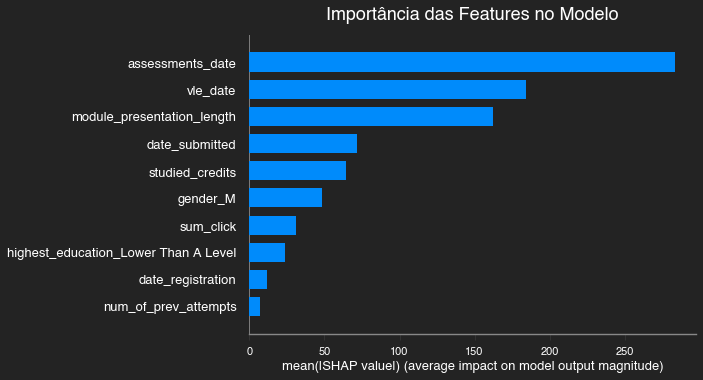

In [383]:
plt.title('Importância das Features no Modelo', size=18, color='w', pad=15)
shap.summary_plot(shap_values, X, plot_type="bar", show=False, max_display=10)
plt.xticks(color='w')
plt.yticks(color='w');

## Testing other Models

In [457]:
from pycaret.regression import * 

In [886]:
grid = setup(df4.drop(columns=['id_student','final_result']), target='weighted_score', 
             html=False, silent=True, verbose=False)

In [887]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.28


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
llar,Lasso Least Angle Regression,536.5113,435496.6934,659.7538,0.0395,2.2051,0.8190,0.043


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
omp,Orthogonal Matching Pursuit,450.9595,332769.3074,576.5502,0.2665,2.0795,0.7613,0.055
llar,Lasso Least Angle Regression,536.5113,435496.6934,659.7538,0.0395,2.2051,0.8190,0.043


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
omp,Orthogonal Matching Pursuit,450.9595,332769.3074,576.5502,0.2665,2.0795,0.7613,0.055
llar,Lasso Least Angle Regression,536.5113,435496.6934,659.7538,0.0395,2.2051,0.8190,0.043


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
omp,Orthogonal Matching Pursuit,450.9595,332769.3074,576.5502,0.2665,2.0795,0.7613,0.055
llar,Lasso Least Angle Regression,536.5113,435496.6934,659.7538,0.0395,2.2051,0.8190,0.043
par,Passive Aggressive Regressor,732.8442,786119.3529,863.0980,-0.7389,2.2724,1.2500,0.164


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
huber,Huber Regressor,433.4155,310204.9313,556.6509,0.3163,2.0143,0.7393,0.847
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
omp,Orthogonal Matching Pursuit,450.9595,332769.3074,576.5502,0.2665,2.0795,0.7613,0.055
llar,Lasso Least Angle Regression,536.5113,435496.6934,659.7538,0.0395,2.2051,0.8190,0.043
par,Passive Aggressive Regressor,732.8442,786119.3529,863.0980,-0.7389,2.2724,1.2500,0.164


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
huber,Huber Regressor,433.4155,310204.9313,556.6509,0.3163,2.0143,0.7393,0.847
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
omp,Orthogonal Matching Pursuit,450.9595,332769.3074,576.5502,0.2665,2.0795,0.7613,0.055
llar,Lasso Least Angle Regression,536.5113,435496.6934,659.7538,0.0395,2.2051,0.8190,0.043


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
huber,Huber Regressor,433.4155,310204.9313,556.6509,0.3163,2.0143,0.7393,0.847
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051
omp,Orthogonal Matching Pursuit,450.9595,332769.3074,576.5502,0.2665,2.0795,0.7613,0.055


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
huber,Huber Regressor,433.4155,310204.9313,556.6509,0.3163,2.0143,0.7393,0.847
en,Elastic Net,450.4699,321568.3531,566.7417,0.2913,2.1038,0.7543,0.051


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075
huber,Huber Regressor,433.4155,310204.9313,556.6509,0.3163,2.0143,0.7393,0.847


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
ada,AdaBoost Regressor,393.7128,236510.1111,485.2050,0.4783,1.8925,0.7034,0.879
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051
lasso,Lasso Regression,436.5882,304568.2750,551.5889,0.3286,2.0495,0.7577,0.075


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
gbr,Gradient Boosting Regressor,231.2581,107587.1072,327.8475,0.7627,1.4363,0.3616,2.034
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
ada,AdaBoost Regressor,393.7128,236510.1111,485.2050,0.4783,1.8925,0.7034,0.879
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117
lar,Least Angle Regression,436.5732,304330.1083,551.3828,0.3291,2.0445,0.7596,0.051


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,186.8041,77483.4852,278.2223,0.8289,1.1946,0.2835,4.529
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
gbr,Gradient Boosting Regressor,231.2581,107587.1072,327.8475,0.7627,1.4363,0.3616,2.034
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
ada,AdaBoost Regressor,393.7128,236510.1111,485.2050,0.4783,1.8925,0.7034,0.879
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,186.8041,77483.4852,278.2223,0.8289,1.1946,0.2835,4.529
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
lightgbm,Light Gradient Boosting Machine,188.9735,81488.6370,285.0126,0.8206,1.1918,0.2948,0.271
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
gbr,Gradient Boosting Regressor,231.2581,107587.1072,327.8475,0.7627,1.4363,0.3616,2.034
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
ada,AdaBoost Regressor,393.7128,236510.1111,485.2050,0.4783,1.8925,0.7034,0.879
lr,Linear Regression,436.5679,304291.8719,551.3489,0.3292,2.0456,0.7591,1.280
ridge,Ridge Regression,436.5640,304288.7250,551.3459,0.3292,2.0457,0.7591,0.039


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,184.6970,74366.2892,272.4601,0.8361,1.2375,0.2841,7.803
xgboost,Extreme Gradient Boosting,186.8041,77483.4852,278.2223,0.8289,1.1946,0.2835,4.529
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
lightgbm,Light Gradient Boosting Machine,188.9735,81488.6370,285.0126,0.8206,1.1918,0.2948,0.271
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
gbr,Gradient Boosting Regressor,231.2581,107587.1072,327.8475,0.7627,1.4363,0.3616,2.034
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
ada,AdaBoost Regressor,393.7128,236510.1111,485.2050,0.4783,1.8925,0.7034,0.879
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
catboost,CatBoost Regressor,184.6970,74366.2892,272.4601,0.8361,1.2375,0.2841,7.803
xgboost,Extreme Gradient Boosting,186.8041,77483.4852,278.2223,0.8289,1.1946,0.2835,4.529
rf,Random Forest Regressor,180.1393,79478.3348,281.6780,0.8247,0.7318,0.2706,8.859
lightgbm,Light Gradient Boosting Machine,188.9735,81488.6370,285.0126,0.8206,1.1918,0.2948,0.271
et,Extra Trees Regressor,189.5972,81974.5276,286.1715,0.8192,0.9853,0.3010,8.533
gbr,Gradient Boosting Regressor,231.2581,107587.1072,327.8475,0.7627,1.4363,0.3616,2.034
dt,Decision Tree Regressor,238.7051,144445.5363,379.9684,0.6810,0.7621,0.3462,0.210
knn,K Neighbors Regressor,270.9132,161827.9812,402.0417,0.6431,1.0266,0.4595,0.227
ada,AdaBoost Regressor,393.7128,236510.1111,485.2050,0.4783,1.8925,0.7034,0.879
br,Bayesian Ridge,436.5415,304303.6750,551.3547,0.3292,2.0461,0.7586,0.117


## Evaluating CatBoost

In [907]:
import catboost as cb
# Build and fit a CatBoost regressor
reg_cat = cb.CatBoostRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=500)
reg_cat.fit(X_train, y_train)

# Calculate the predictions on the set set
pred = reg_cat.predict(X_test)

# Evaluate the performance using the RMSE
rmse_cat = np.sqrt(mean_squared_error(y_test, pred))
r2_cat = r2_score(y_test,preds)
print('RMSE (CatBoost): {:.3f}'.format(rmse_cat))
print("R2 Score (CatBoost): %f" % (r2_cat))

0:	learn: 640.9011424	total: 31.5ms	remaining: 3.12s
1:	learn: 613.8420683	total: 41.2ms	remaining: 2.02s
2:	learn: 589.2122615	total: 45.2ms	remaining: 1.46s
3:	learn: 568.3043504	total: 58.6ms	remaining: 1.41s
4:	learn: 550.1569391	total: 81.1ms	remaining: 1.54s
5:	learn: 533.4426929	total: 89.9ms	remaining: 1.41s
6:	learn: 521.7136007	total: 113ms	remaining: 1.5s
7:	learn: 512.3346170	total: 122ms	remaining: 1.4s
8:	learn: 501.1613231	total: 131ms	remaining: 1.32s
9:	learn: 491.3414974	total: 138ms	remaining: 1.24s
10:	learn: 484.2285152	total: 144ms	remaining: 1.17s
11:	learn: 476.5586894	total: 150ms	remaining: 1.1s
12:	learn: 469.3568318	total: 162ms	remaining: 1.09s
13:	learn: 464.5159563	total: 199ms	remaining: 1.22s
14:	learn: 460.8790998	total: 209ms	remaining: 1.18s
15:	learn: 454.8618027	total: 260ms	remaining: 1.36s
16:	learn: 450.9652783	total: 287ms	remaining: 1.4s
17:	learn: 446.7643875	total: 295ms	remaining: 1.34s
18:	learn: 443.2923856	total: 302ms	remaining: 1.29s
1

In [888]:
catboost = create_model('catboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,180.0286,67956.8720,260.6854,0.8486,1.1465,0.2985
1,184.2683,83776.5600,289.4418,0.8121,1.1974,0.2694
2,191.2844,76493.6884,276.5749,0.8387,1.2948,0.3063
3,184.6295,71569.5612,267.5249,0.8380,1.2373,0.2816
4,187.7371,86948.5839,294.8705,0.8256,1.2861,0.2655
5,180.7427,67693.2854,260.1793,0.8430,1.2494,0.2963
6,188.7102,74619.0046,273.1648,0.8396,1.2680,0.2766
7,183.3299,72493.3719,269.2459,0.8350,1.2352,0.2827
8,186.6824,75073.9402,273.9962,0.8325,1.3299,0.2763
9,179.5565,67038.0242,258.9170,0.8478,1.1307,0.2876


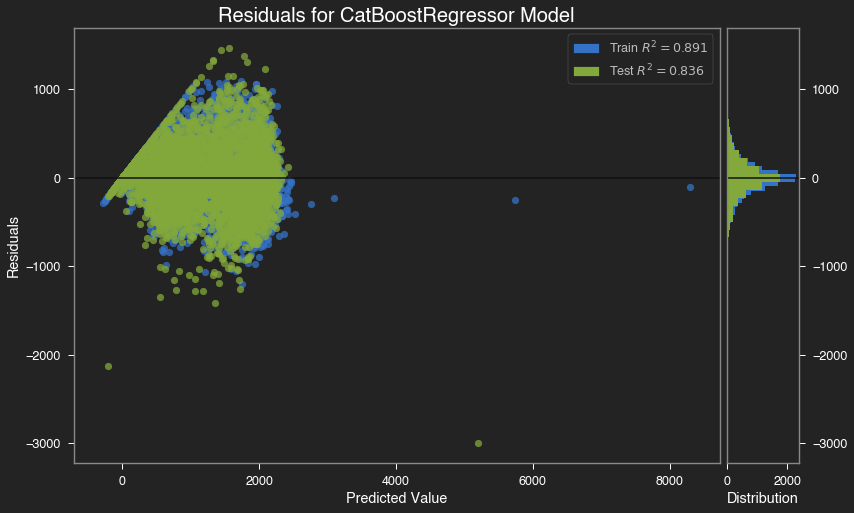

In [889]:
plot_model(catboost)

In [890]:
plot_model(catboost,plot='parameter')

,Parameters
nan_mode,Min
eval_metric,RMSE
iterations,1000
sampling_frequency,PerTree
leaf_estimation_method,Newton
grow_policy,SymmetricTree
penalties_coefficient,1
boosting_type,Plain
model_shrink_mode,Constant
feature_border_type,GreedyLogSum


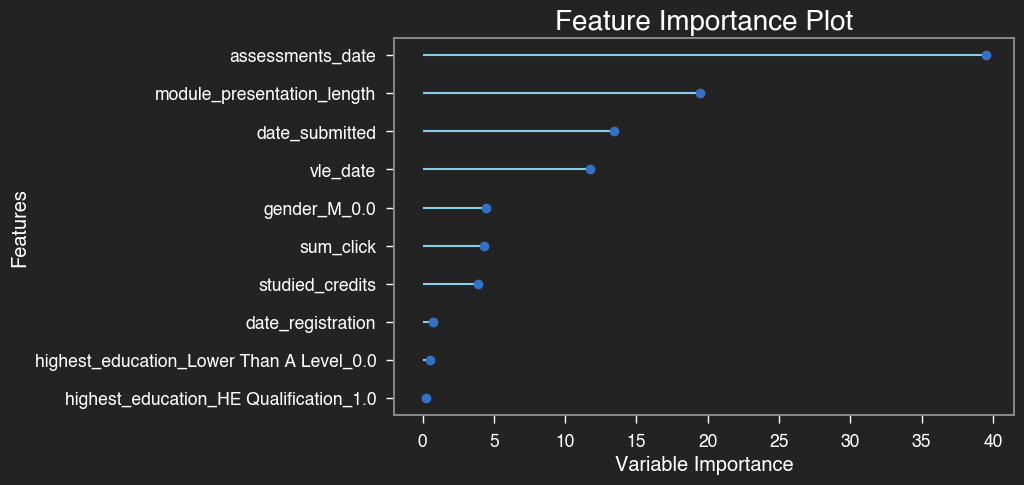

In [891]:
plot_model(catboost,plot='feature')

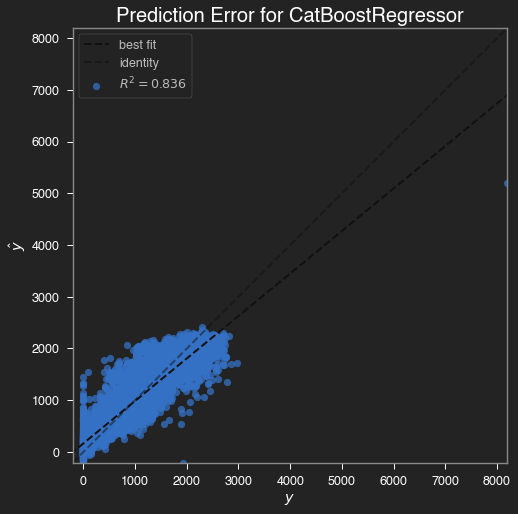

In [892]:
plot_model(catboost,plot='error')

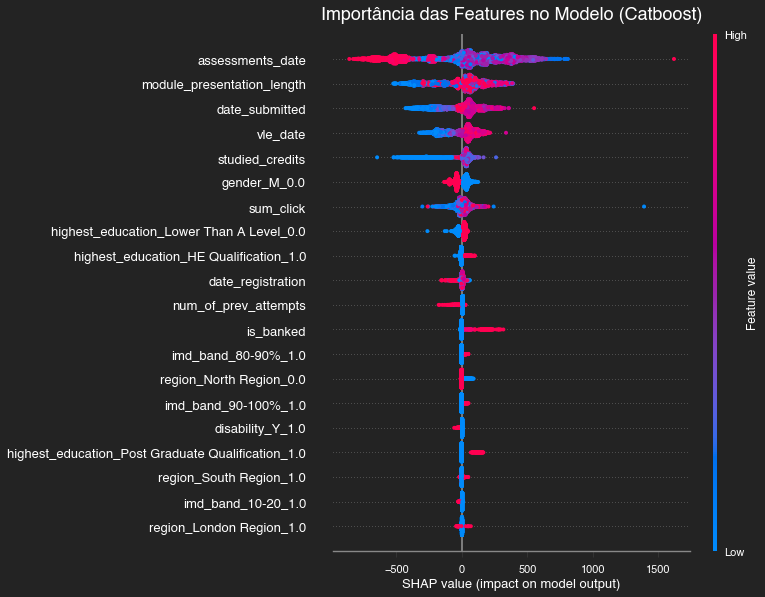

In [910]:
plt.title('Importância das Features no Modelo (Catboost)', size=18, color='w', pad=15)
interpret_model(catboost, show=False)
plt.xticks(color='w')
plt.yticks(color='w');